### Link repositorio 
> **Hint**: Explore the command `Repositorio` [link](https://github.com/Julio99olaf/Pagina-distribucion)

# Distribución Binomial

- Una distribución binomial es una distribución de probabilidad discreta que describe el número de éxitos al realizar n experimentos independientes entre sí, acerca de una variable aleatoria.
- Tiene probabilidad `fija` p de ocurrencia del éxito entre los ensayos. A lo que se denomina «éxito», tiene una probabilidad de ocurrencia p y al otro, «fracaso», tiene una probabilidad q = 1 - p. En la distribución binomial el anterior experimento se repite n veces, de forma independiente, y se designa por $X$ a la variable que mide el número de éxitos que se han producido en los n experimentos. 
- Cuando se dan estas circunstancias, se dice que la variable $X$ sigue una distribución de probabilidad binomial, y se denota $X\sim B(n,p)$.}
- El resultado obtenido en cada experimento es independiente del anterior. Por lo tanto, lo que ocurra en cada experimento no afecta a los siguientes.
- Los sucesos son mutuamente excluyentes, es decir, no pueden ocurrir los 2 al mismo tiempo. No se puede ser hombre y mujer al mismo tiempo o que al lanzar una moneda salga cara y cruz al mismo tiempo.
- Los sucesos son colectivamente exhaustivos, es decir, al menos uno de los 2 ha de ocurrir. Si no se es hombre, se es mujer y, si se lanza una moneda, si no sale cara ha de salir cruz.

### Variable aleatoria binomial

La variable aleatoria binomial {X}, expresa el número de éxitos obtenidos en cada prueba del experimento.

 

La variable binomial es una variable aleatoria discreta, sólo puede tomar los valores $k=0, 1, 2, 3, \dots , n$ suponiendo que se han realizado $n$ pruebas.

 

### Formula de probabilidad de la distribución binomial

$$P(x)={n \choose x}(p)^{x}(q)^{n-x} $$

Donde:

n    = Número de ensayos/experimentos

x    = Número de éxitos

p    = Probabilidad de éxito

q    = Probabilidad de fracaso (1-p)

**La expresión entre corchetes no es una expresión matricial, sino que es un resultado de una combinatoria sin repetición. Este se obtiene con la siguiente formula:**

$$\\C_{n,x}={n \choose i}= \frac{n!}{x!(n-x)!}$$


### Ejemplo
Supongamos que se lanza un dado (con 6 caras) 51 veces y queremos conocer la probabilidad de que el número 3 salga 20 veces. En este caso tenemos una $X \sim B(51, 1/6)$ y la probabilidad sería $P(X=20)$:

$$P(X=20)={51 \choose 20}(1/6)^{20}(1-1/6)^{51-20} $$

In [9]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

In [10]:
n = 51; p=1/6; X=20
print('P(X=20)=',st.binom(n,p).pmf(X))

P(X=20)= 7.444834157690862e-05


### Función de densidad de probabilidad

La función de densidad esuna linea continua que representa la distribución de densidad de una muestra de datos.

**Srirve para:**
- Tener una teoría de la distribución de una variable numérica en una población
- Calcular la probabilidad de ocurrencia. El área debajo de la curva
- Tener distribuciones de referencia cómo la distribución normal

$X\sim B(n,p)$ Parámetros: $n$ y $p$
$$\textbf{Función de densidad de probabilidad}\\p_i=P(X=i)={n \choose i}p^i(1-p)^{n-i}= \frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
>Recordar:$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

$$\textbf{Función de distribución de probabilidad}\\F(x)=\sum_{i=0}^{k-1}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$

In [11]:
# Función que calcula la probabilidad acumulada optimizada
def proba_binomial(n:'Cantidad de ensayos',p:'Probabilidad de los eventos',
                   N:'Cantidad de puntos a graficar'):
    Pr = np.zeros(N)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(N-1)]
    return Pr

(3, 100)


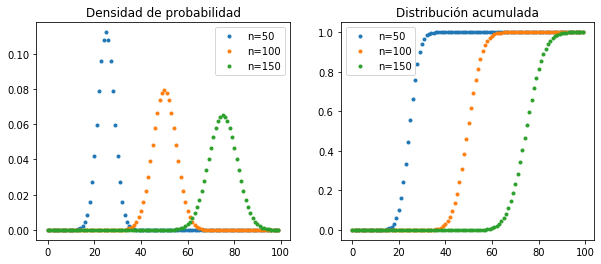

In [12]:
# Comprobación de función creada
# Distintos parámetros para graficar la función binomial
n = [50,100,150]
# Parámetro p de la dristribución
p = 0.5
# Resultado usando método convencional
P = list(map(lambda x,n: proba_binomial(n,p,100),range(len(n)),n))
P = np.asmatrix(P)
print(P.shape)

def grafica_distribucion_prob(P:'Matriz de probabilidades binomiales'):
    # Gráfica de densidad de probabilidad
    fig,(ax1,ax2) = plt.subplots(1,2)
    fig.set_figwidth(10)
    ax1.plot(P.T,'o',markersize=3)
    ax1.legend(['n=50','n=100','n=150'])
    ax1.set_title('Densidad de probabilidad')
    # ax1.show()

    # Probabilidad acumulada
    F = np.cumsum(P,axis=1)
    # plt.figure(2)
    ax2.plot(F.T,'o',markersize=3)
    ax2.legend(['n=%d'%n[0],'n=%d'%n[1],'n=%d'%n[2]])
    ax2.set_title('Distribución acumulada')

    plt.show()
    
# Gráfica del método convencional y vectorizado
grafica_distribucion_prob(P)

Podemos observar un ejemplo grafico programado del comportamiento de la función de densidad de probabilidad. Pondemos notar que a mayor numero de simulación vemos como cada vez la distribución de tu variable es cada vez más suave y puedes intuir mejor como es la forma de la distribución y ver como es capaz de ver un contorno mucho más fino. 

### Relaciones con otras variables aleatorias

Si n tiende a infinito y p es tal que el producto entre ambos parámetros tiende a $\lambda$, entonces la distribución de la variable aleatoria binomial tiende a una distribución de Poisson de parámetro $\lambda$.

Por último, se cumple que cuando $p =0.5$ y n es muy grande (usualmente se exige que $n\geq 30$) la distribución binomial puede aproximarse mediante la distribución normal, con parámetros $\mu=np,\sigma^2=np(1-p)$.

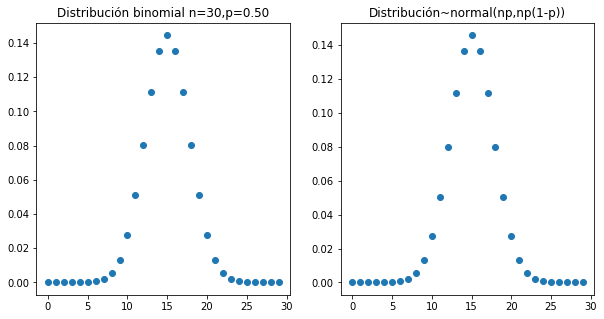

In [13]:
p = .5; n = 30
mu = n*p; sigma = np.sqrt(n*p*(1-p))

# Usando nuetra función creada
Bi = proba_binomial(n,p,n)
plt.figure(1,figsize=[10,5])
plt.subplot(121)
plt.plot(Bi,'o')
plt.title('Distribución binomial n=%i,p=%0.2f'%(n,p))

# Usando la función de la librería scipy para graficar la normal
x = np.arange(0,n)
Bi_norm = st.norm.pdf(x,loc=mu,scale=sigma)
plt.subplot(122)
plt.plot(Bi_norm,'o')
plt.title('Distribución~normal(np,np(1-p))')
plt.show()

Bibliografias:

https://conceptosclaros.com/para-que-sirve-la-funcion-densidad-probabilidad/
https://www.superprof.es/apuntes/escolar/matematicas/probabilidades/distribucion-binomial/funcion-de-probabilidad-de-la-distribucion-binomial.html
https://economipedia.com/definiciones/distribucion-binomial.html


# Distribución trapezoidal

El modelo trapezoidal surge en el ámbito de las distribuciones aplicadas en el PERT: Beta, Triangular y Uniforme, como un híbrido entre la distribución Triangular y la Rectangular. En esta distribución se facilita la labor del supuesto experto, ya que puede situar
la moda entre un intervalo $M_1$ y $M_2$.

La distribución trapezoidal pertenece a un amplio grupo de *distribuciones de
probabilidad continuas* univariantes, tales que la representación gráfica de su función de densidad es una figura geométrica determinada: rectángulo, triángulo, trapecio, parábola, etc., de la que se deriva la denominación de la propia distribución: rectangular, triangular, trapezoidal, parabólica, etc.


> La distribución trapezoidal responde a la siguiente función de densidad:
$$f(x)=\left\{\begin{matrix}\\0 , si x = a & \\ \frac{2}{b-a+m_2-m_1}*\frac{x-a}{m_1-a} , si A < x <= M_1 & \\ \frac{2}{b-a+m_2-m_1}, si M_1 <= x <= M_2  & \\ \frac{2}{b-a+m_2-m_1}*\frac{b-x}{b-m_2},  si M_2 <= x < b & \\ 0 , si x >= b  \end{matrix}  \right.\ $$

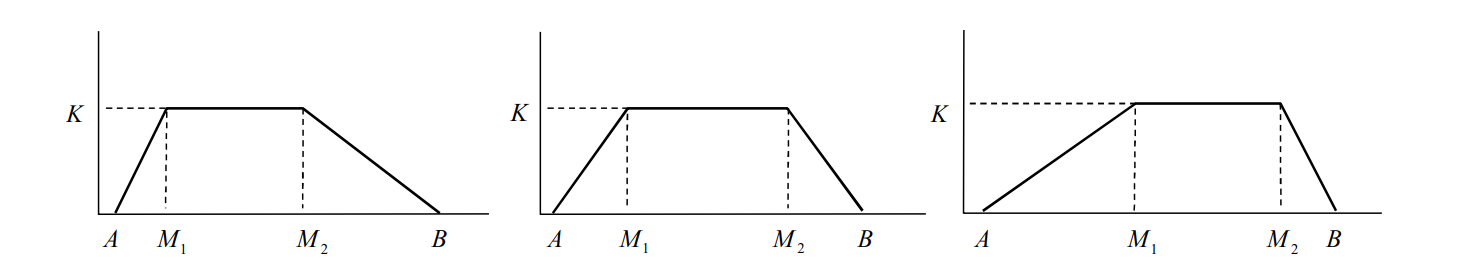
A = Escenario pesimista
B= Escenario optimista
$(M_1,M_2)$ = Intervalo modal

> Las características estocásticas de la distribución trapezoidal son:
$E[T] = \frac{1}{3}[a+m_1+m_2+b- \frac{bm_2-am_1}{b-m_1+m_2-a}]$
$V[T] = \frac{1}{18}[\frac{-(b-m_1)^2 (m_2-a)^2+(m_1-a)(b-m_2)-2(b-a)(m_2-m_1)(m_1-a)(b-m_1)}{(b-m_1+m_2-a)^2}]$


Es fácil ver que dicha distribución coincide con la uniforme si $a=m_1 y b=m_2$ o con la triangular si $m_1 = m_2 = m$


> *TEOREMA:* Si $m_1 < c= \frac {a+b}{2} < m_2$, entonces la media de la distribución trapezoidal está en el intervalo $(c,m_2)$ o bien en el intervalo $(m_1,c)$, según sea la distancia entre c y m_2 mayor o menor, respectivamente, que la distancia entre $m_1 y c$. 

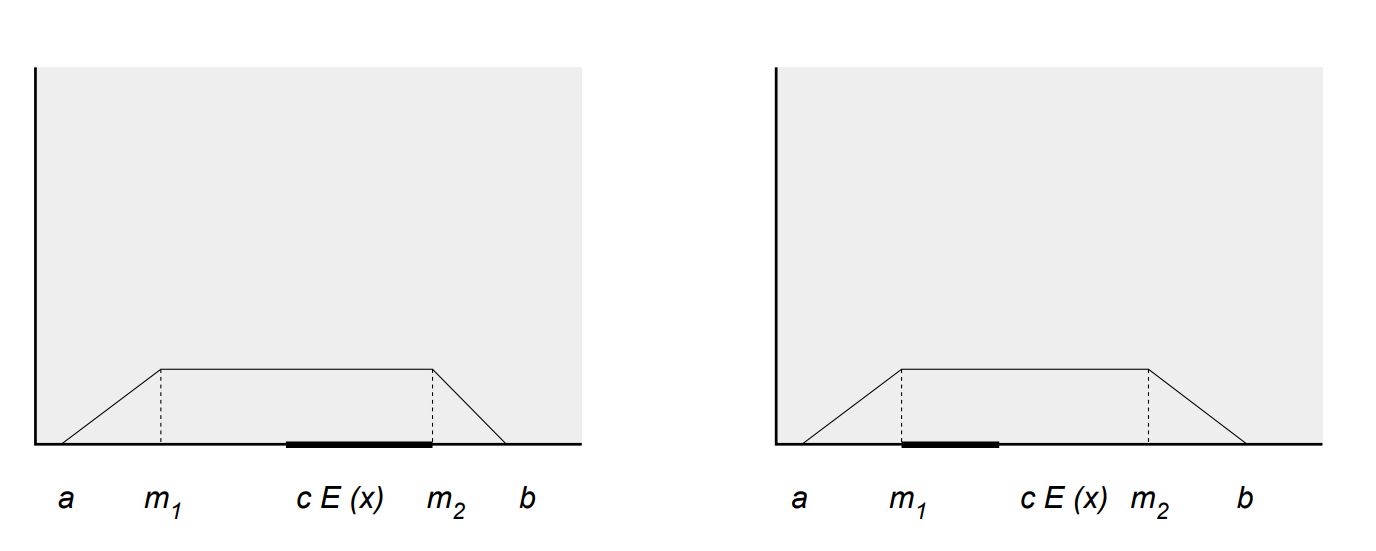

Atendiendo a este resultado y recordando que tanto en la distribución Triangular como en la Beta, en los casos de asimetría el valor
esperado pertenece al intervalo determinado por el valor modal y el centro, o bien entre el centro y la moda, según sea ésta menor o
mayor que aquél. 

# EJEMPLO EN PYTHON

In [44]:
from scipy.stats import trapz
import matplotlib.pyplot as plt
import numpy as np

In [31]:
c, d = 0.2, 0.8
mean, var, skew, kurt = trapz.stats(c, d, moments='mvsk')

In [40]:
x = np.linspace(trapz.ppf(0.01, c, d),
                trapz.ppf(0.99, c, d), 100)

In [38]:
rv = trapz(c, d)

In [45]:
vals = trapz.ppf([0.001, 0.5, 0.999], c, d)
np.allclose([0.001, 0.5, 0.999], trapz.cdf(vals, c, d))

True

In [35]:
r = trapz.rvs(c, d, size=1000)

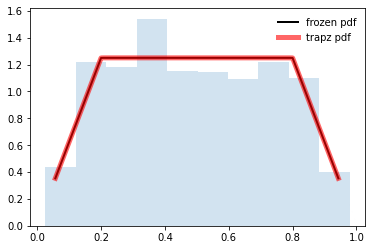

In [41]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.plot(x, trapz.pdf(x, c, d),
       'r-', lw=5, alpha=0.6, label='trapz pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

https://w3.ual.es/personal/jetrini/objetos/trapezoidal.pdf

file:///C:/Users/Karely%20Mayorquin/Downloads/Dialnet-AnalisisComparativoDeTresDistribucionesTrapezoidal-4749253.pdf